# ДЗ6: Fourier transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.testing import assert_allclose

In [2]:
def x_n(f, N):
    t = np.linspace(0, N, round(N))
    x_n = []
    for i in range (t.size):
        x_n.append(f(t[i]))
    x_n = np.array(x_n)
    return x_n, t

def dft(x_n):
    x_n = np.array(x_n)
    X = []
    N = x_n.size
    for k in range (N):
        X_n = 0
        for t in range(N):
            X_n += x_n[t] * np.exp(-1j * 2 * np.pi * k * t / N)
        X.append(X_n)
    return np.array(X)

In [3]:
def f0(x):
    return np.sin(3*x) + np.cos(7*x)
def f1(x):
    return x**2 + 25*x + 60
def f2(x):
    return np.log(25*(x+3) + (x+3)**3) 

In [4]:
#Testing
assert_allclose(dft(x_n(f0, 1000)[0]), np.fft.fft(x_n(f0, 1000)[0]))
assert_allclose(dft(x_n(f1, 1000)[0]), np.fft.fft(x_n(f1, 1000)[0]))
assert_allclose(dft(x_n(f2, 1000)[0]), np.fft.fft(x_n(f2, 1000)[0]))

In [5]:
%timeit np.fft.fft(x_n(f2, 100)[0])

804 µs ± 78.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%timeit dft(x_n(f2, 100)[0])

116 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Получается жутко медленно, поэтому нужен алгоритм, который считал бы быстрее

In [7]:
def idft(X_n):
    x = []
    N = X_n.size
    for k in range (N):
        x_n = 0
        for t in range(N):
            x_n += X_n[t] * np.exp(1j * 2 * np.pi * k * t / N) * (1/N)
        x.append(x_n)
    return np.array(x)

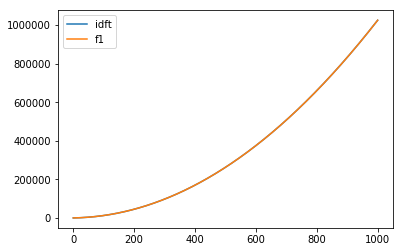

In [8]:
t = x_n(f1, 1000)[1]
X_n = dft(x_n(f1, 1000)[0])
y = idft(X_n)
plt.plot(t, np.real(y), label = 'idft')
plt.plot(t, x_n(f1, 1000)[0], label = 'f1')
plt.legend()

Еще раз убеждаемся, что прямой дискретный Фурье и обратный работают

In [9]:
def fft(x):
    N = len(x)
    if np.log2(N) % 1 > 0:
        raise ValueError('x.size must be a power of 2, "{}" given.'.format(N))
    if N <= 1: 
        return x
    s_even = fft(x[0::2])
    s_odd = fft(x[1::2])
    X_m = []
    X_m2 = []
    for k in range(N//2):
        t = np.exp(-2j*np.pi*k/N)*s_odd[k]
        x_m = s_even[k] + t 
        x_m2 = s_even[k] - t
        X_m.append(x_m)
        X_m2.append(x_m2)
    return np.array(X_m + X_m2)

In [10]:
#Testing
assert_allclose(fft(x_n(f0, 2**10)[0]), np.fft.fft(x_n(f0, 2**10)[0]))
assert_allclose(fft(x_n(f1, 2**10)[0]), np.fft.fft(x_n(f1, 2**10)[0]))
assert_allclose(fft(x_n(f2, 2**10)[0]), np.fft.fft(x_n(f2, 2**10)[0]))

In [11]:
%timeit fft(x_n(f2, 2**7)[0])

9.21 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
def ifft0(x): 
    N = len(x)
    if np.log2(N) % 1 > 0:
        raise ValueError('x.size must be a power of 2, "{}" given.'.format(N))
    if N <= 1: 
        return x
    s_even = ifft0(x[0::2])
    s_odd = ifft0(x[1::2])
    X_m = []
    X_m2 = []
    for k in range(N//2):
        t = np.exp(2j*np.pi*k/N)*s_odd[k]
        x_m = (s_even[k] + t)
        x_m2 = (s_even[k] - t)
        X_m.append(x_m)
        X_m2.append(x_m2)
    return X_m + X_m2 
def ifft(x):
    n = len(x)
    a = ifft0(x)
    return [a[i] / n for i in range(n)]

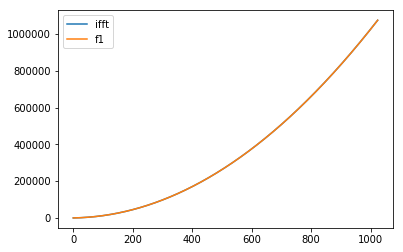

In [13]:
t = x_n(f1, 2**10)[1]
X_n = fft(x_n(f1, 2**10)[0])
y = ifft(X_n)
plt.plot(t, np.real(y), label = 'ifft')
plt.plot(t, x_n(f1, 2**10)[0], label = 'f1')
plt.legend()